In [2]:
# importing the necessary libraries:
import warnings
warnings.filterwarnings("ignore")
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scrublet as scr
import leidenalg

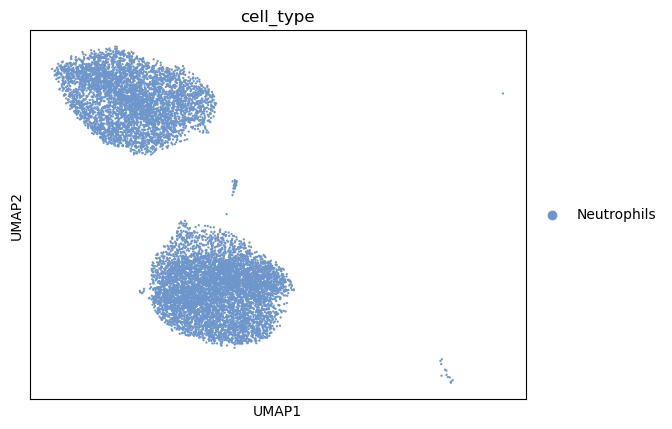

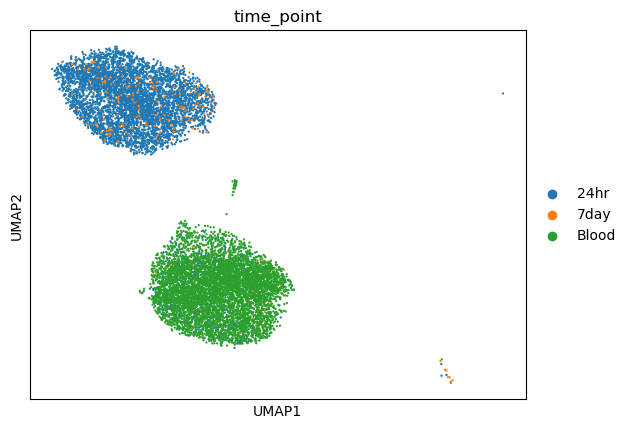

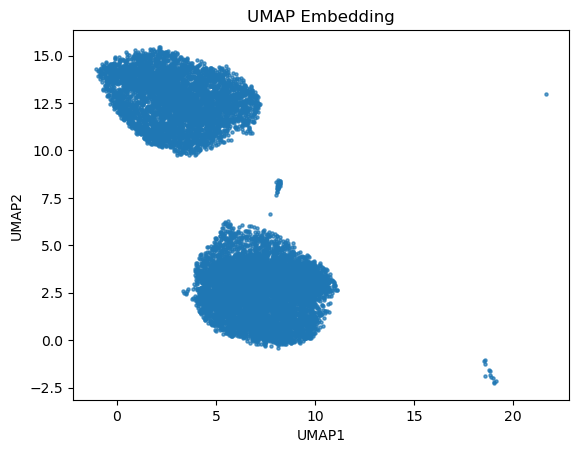

In [3]:
import matplotlib.pyplot as plt
import scanpy as sc

# Adjust font sizes globally for consistency
#plt.rcParams['axes.titlesize'] = 16  # Title font size
#plt.rcParams['axes.labelsize'] = 14  # Axis label font size
#plt.rcParams['xtick.labelsize'] = 14  # X-axis tick font size
#plt.rcParams['ytick.labelsize'] = 14  # Y-axis tick font size
#plt.rcParams['legend.fontsize'] = 14  # Legend font size
plt.rcdefaults()
wound_neutro = sc.read('wound_with_clusternames.h5ad')
sc.pl.umap(wound_neutro, color='cell_type')
sc.pl.umap(wound_neutro, color='time_point')
# use umap coordinates to find the parametres (x & y) of outlier cells and then visualise it
x, y = wound_neutro.obsm["X_umap"].T
plt.scatter(x, y, s=5, alpha=0.7)  # Small points for better visualization
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP Embedding")
plt.show()
# filtering outlier cells
idx = wound_neutro.obs_names[((x < 12) & ((y < 6.45) | (y > 9))).nonzero()[0]]
# subsetting the dataset
wound_neutro = wound_neutro[idx]
# saving the AnnData object
wound_neutro.write('wound_neutro_filtered.h5ad')

In [4]:
x_umap = wound_neutro.obsm["X_umap"][:, 0]  # First column (UMAP1)
y_umap = wound_neutro.obsm["X_umap"][:, 1]  # Second column (UMAP2)

print("X (UMAP1):", x_umap[:5])  # First 5 UMAP1 values
print("Y (UMAP2):", y_umap[:5])  # First 5 UMAP2 values


X (UMAP1): [4.254598  6.7128487 2.3346212 1.7936187 3.7728455]
Y (UMAP2): [10.847709  1.441644 12.938522 13.252529 13.128785]


In [5]:
wound_neutro.obsm

AxisArraysView with keys: X_pca, X_tsne, X_umap

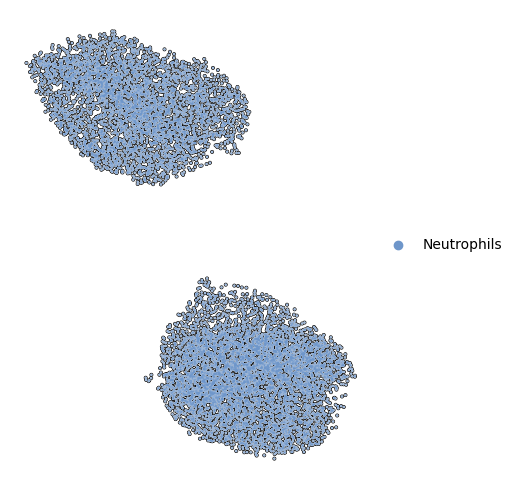

In [6]:
palette = {
    "Neutrophils":"#6e96ca"
}
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.umap(wound_neutro, color=['cell_type'], ax=ax, palette=palette, add_outline=True, show=False)
ax.set(xlabel="", ylabel="")
ax.set_axis_off()
ax.title.set_visible(False)
ax.set_aspect(1.0)
fig.tight_layout()
plt.show()

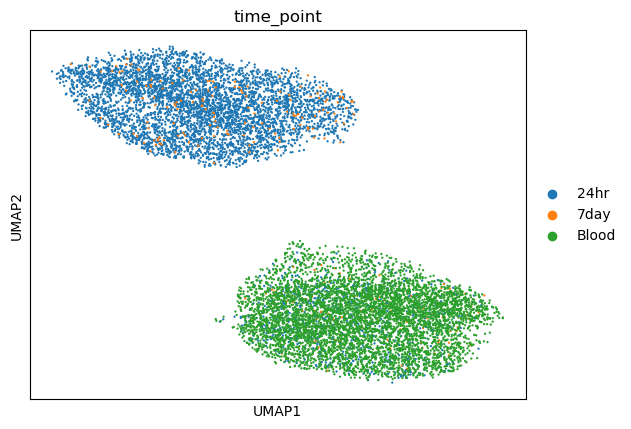

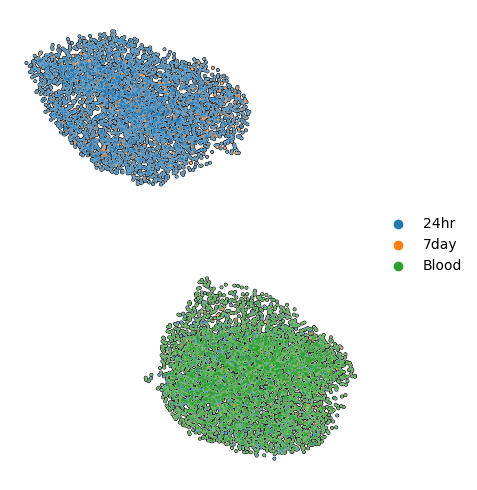

In [7]:
sc.pl.umap(wound_neutro, color='time_point')
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.umap(wound_neutro, color=['time_point'], ax=ax, add_outline=True, show=False)
ax.set(xlabel="", ylabel="")
ax.set_axis_off()
ax.title.set_visible(False)
ax.set_aspect(1.0)
fig.tight_layout()
plt.show()


**Neutrophils clustering**

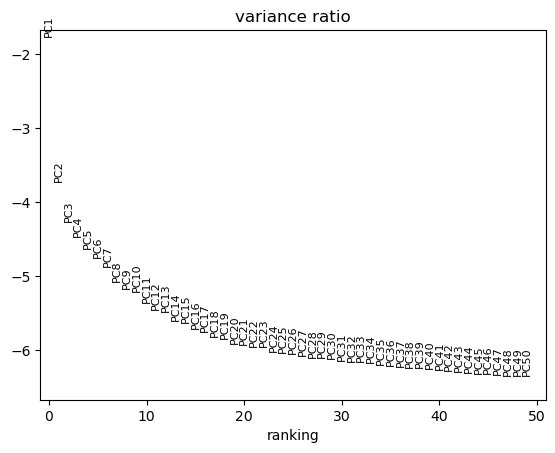

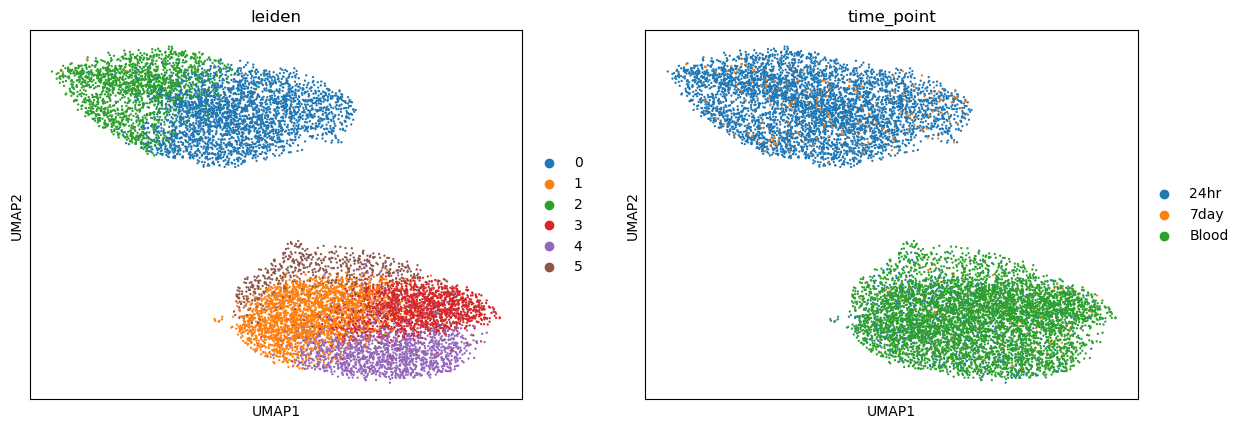

In [8]:
sc.pp.highly_variable_genes(wound_neutro, min_mean=0.1, max_mean=10, min_disp=0.5)
sc.tl.pca(wound_neutro)
sc.pl.pca_variance_ratio(wound_neutro, n_pcs=50, log=True)
sc.pp.neighbors(wound_neutro, n_neighbors=10, n_pcs=8)
sc.tl.leiden(wound_neutro, resolution=0.3)
sc.pl.umap(wound_neutro, color=['leiden', 'time_point'])

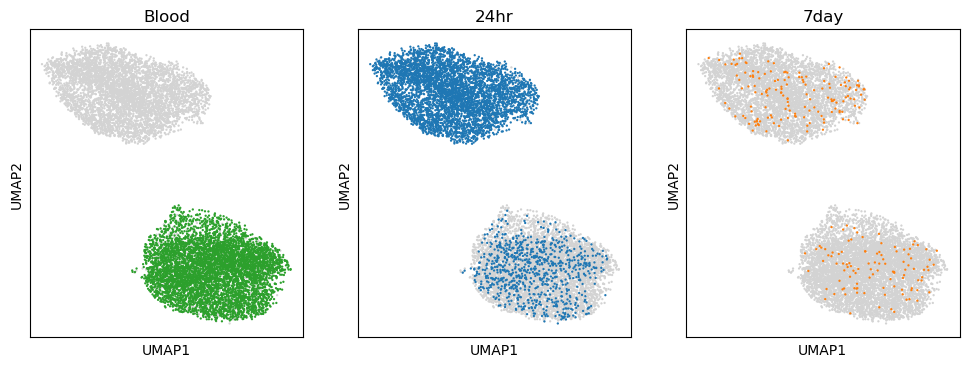

In [9]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))
for tp, ax in zip(['Blood', '24hr', '7day'], axs.ravel()):
    sc.pl.umap(wound_neutro, color='time_point', groups=tp, title=tp, legend_loc=None, ax=ax, show=False)
plt.show()

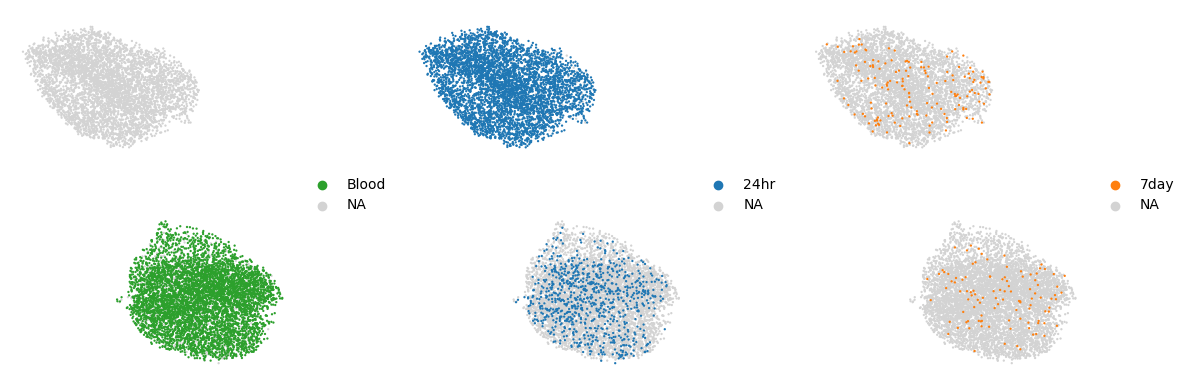

In [10]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))
for tp, ax in zip(['Blood', '24hr', '7day'], axs.ravel()):
    sc.pl.umap(wound_neutro, color='time_point', groups=tp, title=tp, ax=ax, add_outline=False, show=False)
    ax.set(xlabel="", ylabel="")
    ax.set_axis_off()
    ax.title.set_visible(False)
    #ax.set_aspect(1.0)
    fig.tight_layout()
plt.show()

In [99]:
wound_neutro.obs.groupby(['time_point']).size()

time_point
24hr     5324
7day      258
Blood    5406
dtype: int64

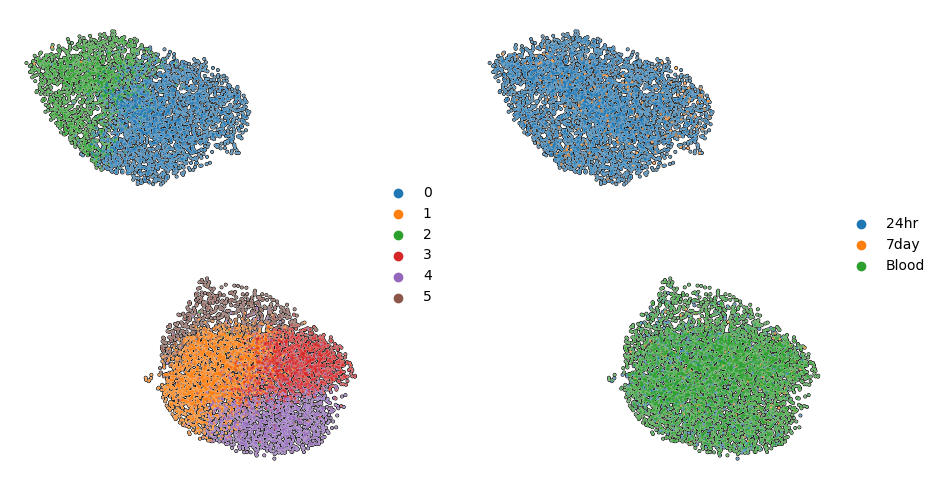

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create two subplots in a row (for 'leiden' and 'time_point')

# Plot for 'leiden'
sc.pl.umap(wound_neutro, color='leiden', ax=axes[0], add_outline=True, show=False)
axes[0].set(xlabel="", ylabel="")  # Remove axis labels
axes[0].set_axis_off()             # Turn off axes
axes[0].title.set_visible(False)   # Hide the title
axes[0].set_aspect(1.0)            # Set square aspect ratio

# Plot for 'time_point'
sc.pl.umap(wound_neutro, color='time_point', ax=axes[1], add_outline=True, show=False)
axes[1].set(xlabel="", ylabel="")  # Remove axis labels
axes[1].set_axis_off()             # Turn off axes
axes[1].title.set_visible(False)   # Hide the title
axes[1].set_aspect(1.0)            # Set square aspect ratio

# Adjust layout and display the figure
fig.tight_layout()
plt.show()


In [78]:
# Check the columns in your `AnnData` object to see if 'time_point' and 'cluster' (or equivalent) exist
print(wound_neutro.obs.columns)
# Group by 'time_point' and 'cluster' (or your equivalent cluster column)
cluster_counts = wound_neutro.obs.groupby(['time_point', 'leiden']).size()

# Normalize by time point to calculate relative abundance
time_point_counts = wound_neutro.obs.groupby('time_point').size()
relative_abundance = cluster_counts / time_point_counts

# Convert to DataFrame for easier plotting
relative_abundance_df = relative_abundance.unstack(fill_value=0)

print(relative_abundance_df)


Index(['time_point', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes',
       'doublet_scores', 'predicted_doublets', 'leiden', 'cell_type'],
      dtype='object')
leiden             0         1         2         3         4         5
time_point                                                            
24hr        0.513336  0.074192  0.336026  0.029113  0.035875  0.011458
7day        0.430233  0.131783  0.166667  0.112403  0.127907  0.031008
Blood       0.000000  0.375509  0.000000  0.268036  0.253977  0.102479


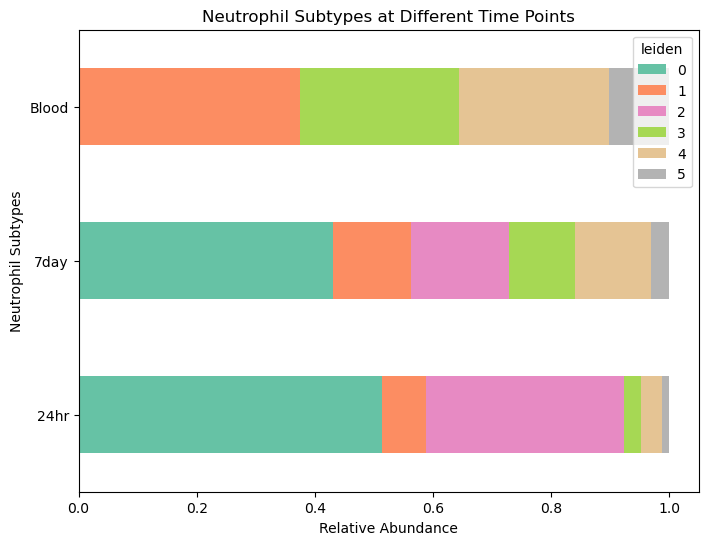

In [79]:
# Plot the stacked bar plot with neutrophil subtypes on the y-axis and abundance on the x-axis
ax = relative_abundance_df.plot(kind='barh', stacked=True, figsize=(8, 6), colormap='Set2')

# Labels and title
ax.set_xlabel('Relative Abundance')
ax.set_ylabel('Neutrophil Subtypes')
ax.set_title('Neutrophil Subtypes at Different Time Points')

# Customizing y-axis labels for readability (optional)
plt.xticks(rotation=0)

# Show the plot
plt.show()


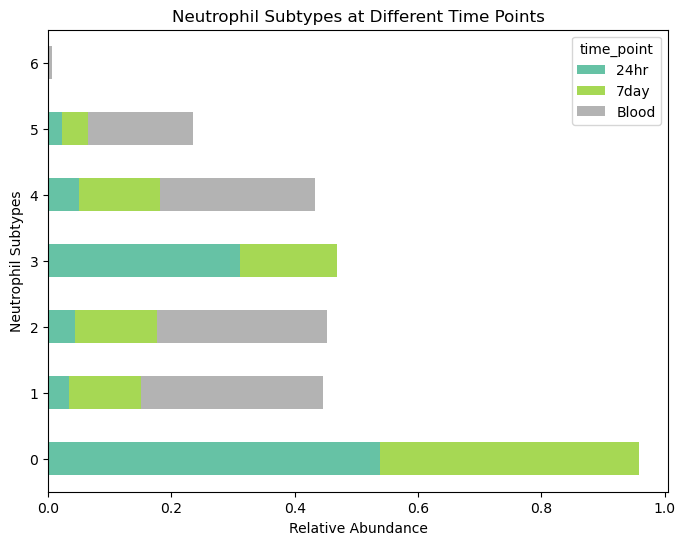

In [37]:
# Plot the stacked bar plot with neutrophil subtypes on the y-axis and abundance on the x-axis
ax = relative_abundance_df.T.plot(kind='barh', stacked=True, figsize=(8, 6), colormap='Set2')

# Labels and title
ax.set_xlabel('Relative Abundance')
ax.set_ylabel('Neutrophil Subtypes')
ax.set_title('Neutrophil Subtypes at Different Time Points')

# Customizing x-axis labels for readability
plt.yticks(rotation=0)

# Show the plot
plt.show()


In [80]:
# check the number of cells and genes in the wound_neutro
print(wound_neutro.shape)
# inspect the obs dataframe for the wound_neutro
print(wound_neutro.obs.head())

(10988, 25223)
            time_point  n_genes_by_counts  log1p_n_genes_by_counts  \
Wound_56_1        24hr                874                 6.774224   
Wound_65_1        24hr               1520                 7.327123   
Wound_67_1        24hr                750                 6.621406   
Wound_413_1       24hr                831                 6.723832   
Wound_420_1       24hr               1170                 7.065613   

             total_counts  log1p_total_counts  pct_counts_in_top_50_genes  \
Wound_56_1           4393            8.387995                   50.899158   
Wound_65_1           4938            8.504918                   27.521264   
Wound_67_1           2283            7.733684                   36.224266   
Wound_413_1          2228            7.709308                   33.662478   
Wound_420_1          5006            8.518592                   36.675989   

             pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \
Wound_56_1                  

In [81]:
cluster_0 = wound_neutro[wound_neutro.obs['leiden'] == '0']
cluster_1 = wound_neutro[wound_neutro.obs['leiden'] == '1']

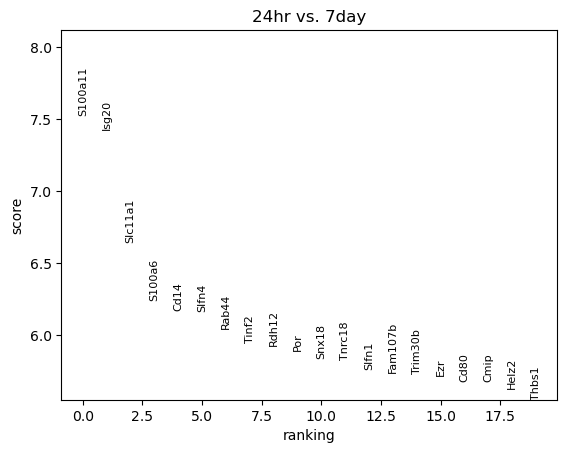

ValueError: no field of name Blood

In [82]:
sc.tl.rank_genes_groups(cluster_0, groupby='time_point', reference='7day', method='wilcoxon')
sc.pl.rank_genes_groups(cluster_0, n_genes=20, sharey=False)
differentially_expressed = cluster_0.uns['rank_genes_groups']
top_10_upregulated = differentially_expressed['names']['24hr'][:10]
top_10_upregulated_Blood = differentially_expressed['names']['Blood'][:10]
sc.pl.dotplot(cluster_0, var_names=top_10_upregulated, groupby='time_point')
sc.pl.dotplot(cluster_0, var_names=top_10_upregulated_Blood, groupby='time_point')

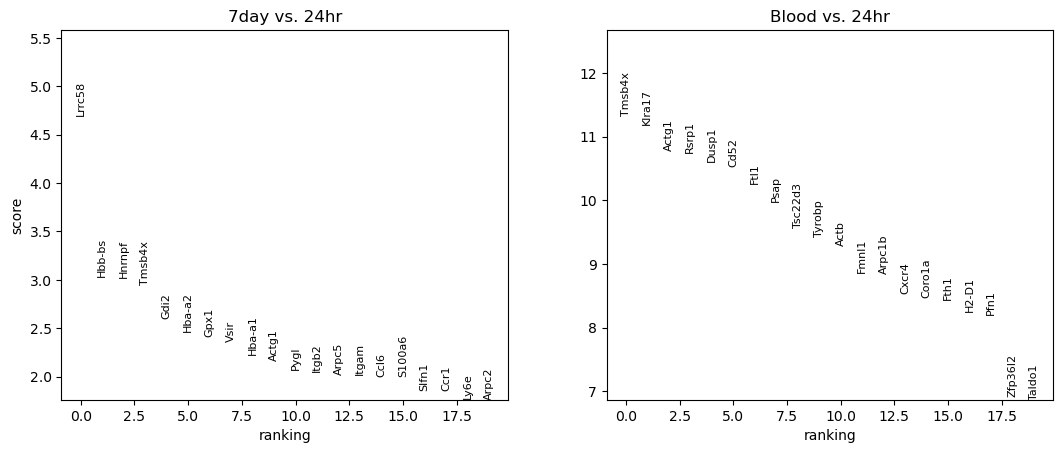

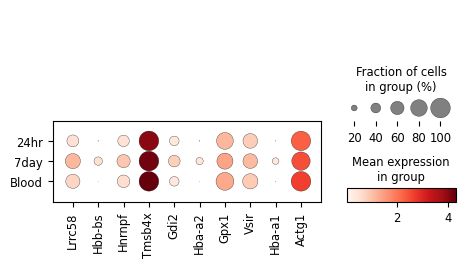

In [83]:
sc.tl.rank_genes_groups(cluster_1, groupby='time_point', reference='24hr', method='wilcoxon')
sc.pl.rank_genes_groups(cluster_1, n_genes=20, sharey=False)
differentially_expressed = cluster_1.uns['rank_genes_groups']
top_10_upregulated = differentially_expressed['names']['7day'][:10]
sc.pl.dotplot(cluster_1, var_names=top_10_upregulated, groupby='time_point')


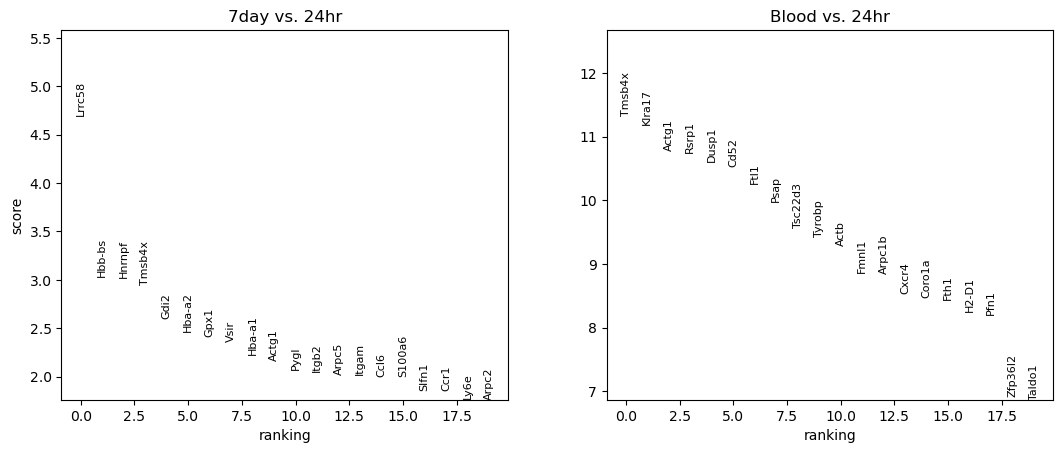

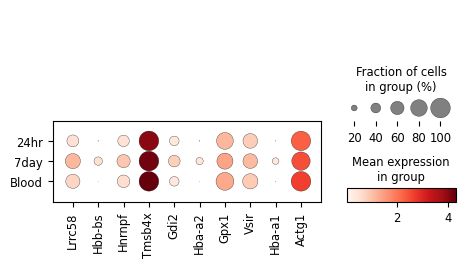

In [84]:
sc.tl.rank_genes_groups(cluster_1, groupby='time_point', reference='24hr', method='wilcoxon')
sc.pl.rank_genes_groups(cluster_1, n_genes=20, sharey=False)
differentially_expressed = cluster_1.uns['rank_genes_groups']
top_10_upregulated = differentially_expressed['names']['7day'][:10]
sc.pl.dotplot(cluster_1, var_names=top_10_upregulated, groupby='time_point')


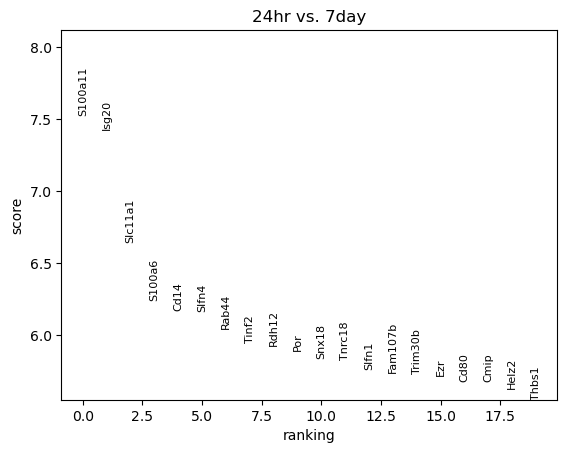

In [85]:
# Filter the AnnData object based on time_point
neutro_filtered = wound_neutro[wound_neutro.obs['leiden'].isin(['0'])]

# perform differential expression analysis between 24hr and 7day
sc.tl.rank_genes_groups(neutro_filtered, groupby='time_point', reference='7day', method='wilcoxon')

# You can visualize the top ranked genes
sc.pl.rank_genes_groups(neutro_filtered, n_genes=20, sharey=False)

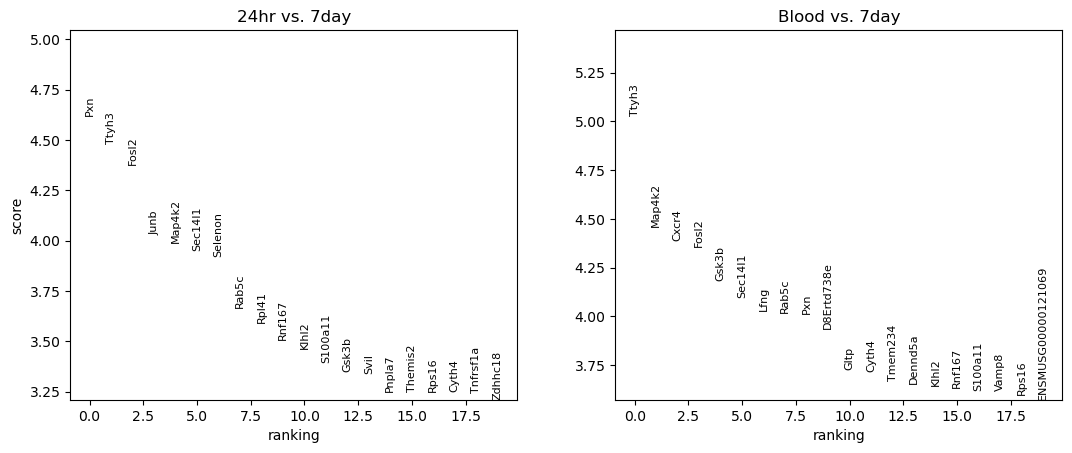

In [86]:
# Filter the AnnData object based on time_point
neutro_filtered = wound_neutro[wound_neutro.obs['leiden'].isin(['1'])]

# perform differential expression analysis between 24hr and 7day
sc.tl.rank_genes_groups(neutro_filtered, groupby='time_point', reference='7day', method='wilcoxon')

# You can visualize the top ranked genes
sc.pl.rank_genes_groups(neutro_filtered, n_genes=20, sharey=False)

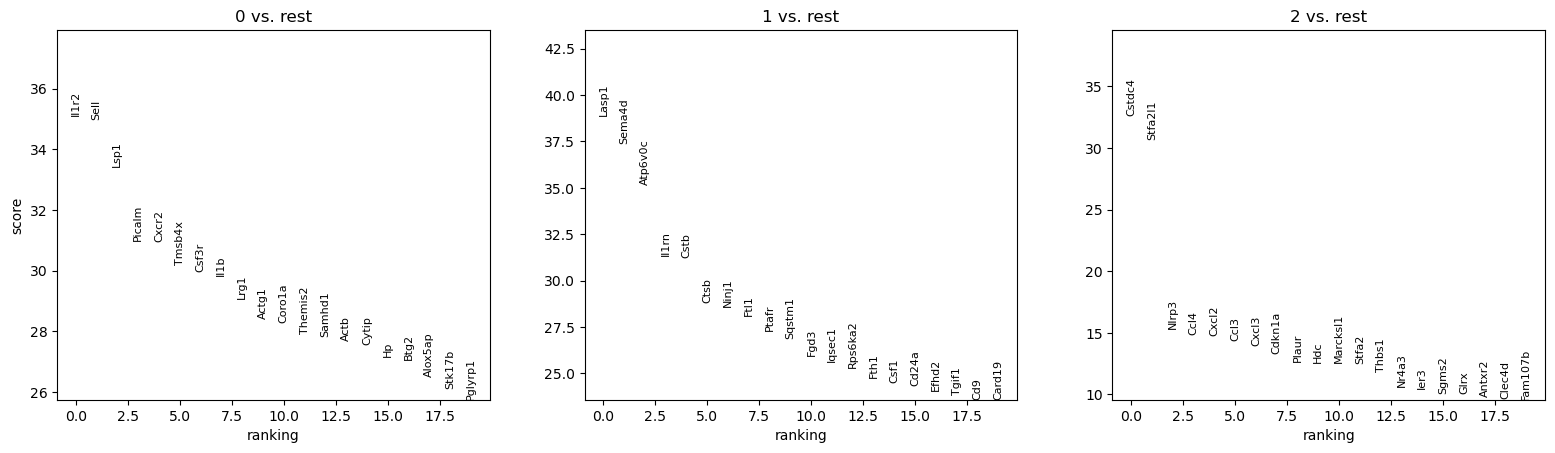

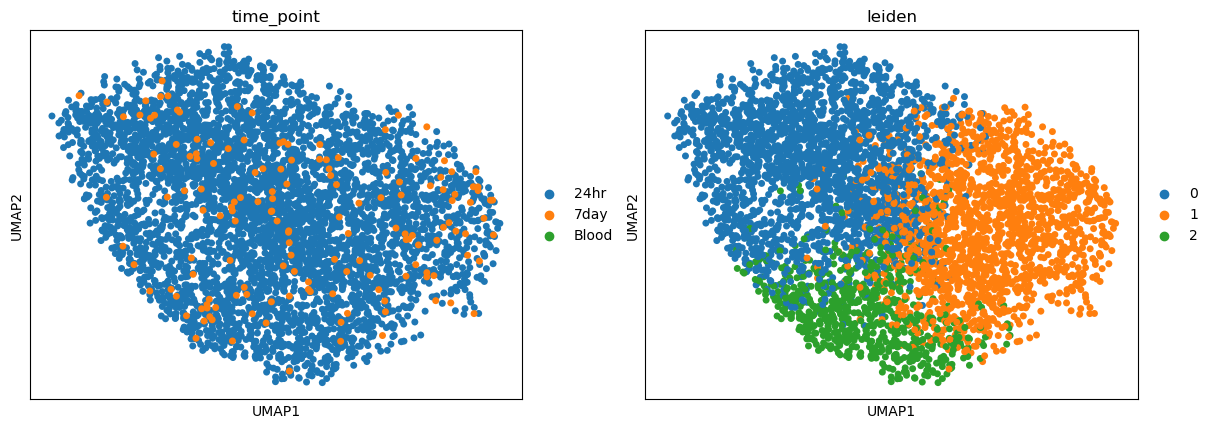

leiden  time_point
0       24hr          2202
        7day            47
        Blood            0
1       24hr          1621
        7day            86
        Blood            0
2       24hr           684
        7day            20
        Blood            0
dtype: int64

In [87]:
wound_neutro = sc.read('wound_with_clusternames.h5ad')
# subset the cluster you want to sub-cluster
cluster_1 = wound_neutro[wound_neutro.obs['leiden'] == '1']
# preprocessing for sub-clustering
# 1.identify highly variable genes
sc.pp.highly_variable_genes(cluster_1)
# 2.perform PCA
sc.tl.pca(cluster_1)
# performing clustering on the subset
# 1.compute the neighborhood graph
sc.pp.neighbors(cluster_1, n_neighbors=10, n_pcs=40)
# 2.run leiden clustering
sc.tl.leiden(cluster_1, resolution=0.3)
# find marker genes for the sub-clusters
sc.tl.rank_genes_groups(cluster_1, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(cluster_1, n_genes=20, sharey=False)
# determine the time_point origins
# 1.add the time_point information to your subset
cluster_1.obs['time_point']=wound_neutro.obs['time_point']
# 2.visualise or calculate proportion of time_points in sub-cluster
sc.pl.umap(cluster_1, color=['time_point','leiden'], size=100)
# 3.calculate the distribution of each time_point
cluster_1.obs.groupby(['leiden','time_point']).size()

In [88]:
from scipy.stats import fisher_exact
fisher_exact([[2799, 203], [1650, 242]])

SignificanceResult(statistic=2.022266009852217, pvalue=2.5823121447337403e-12)

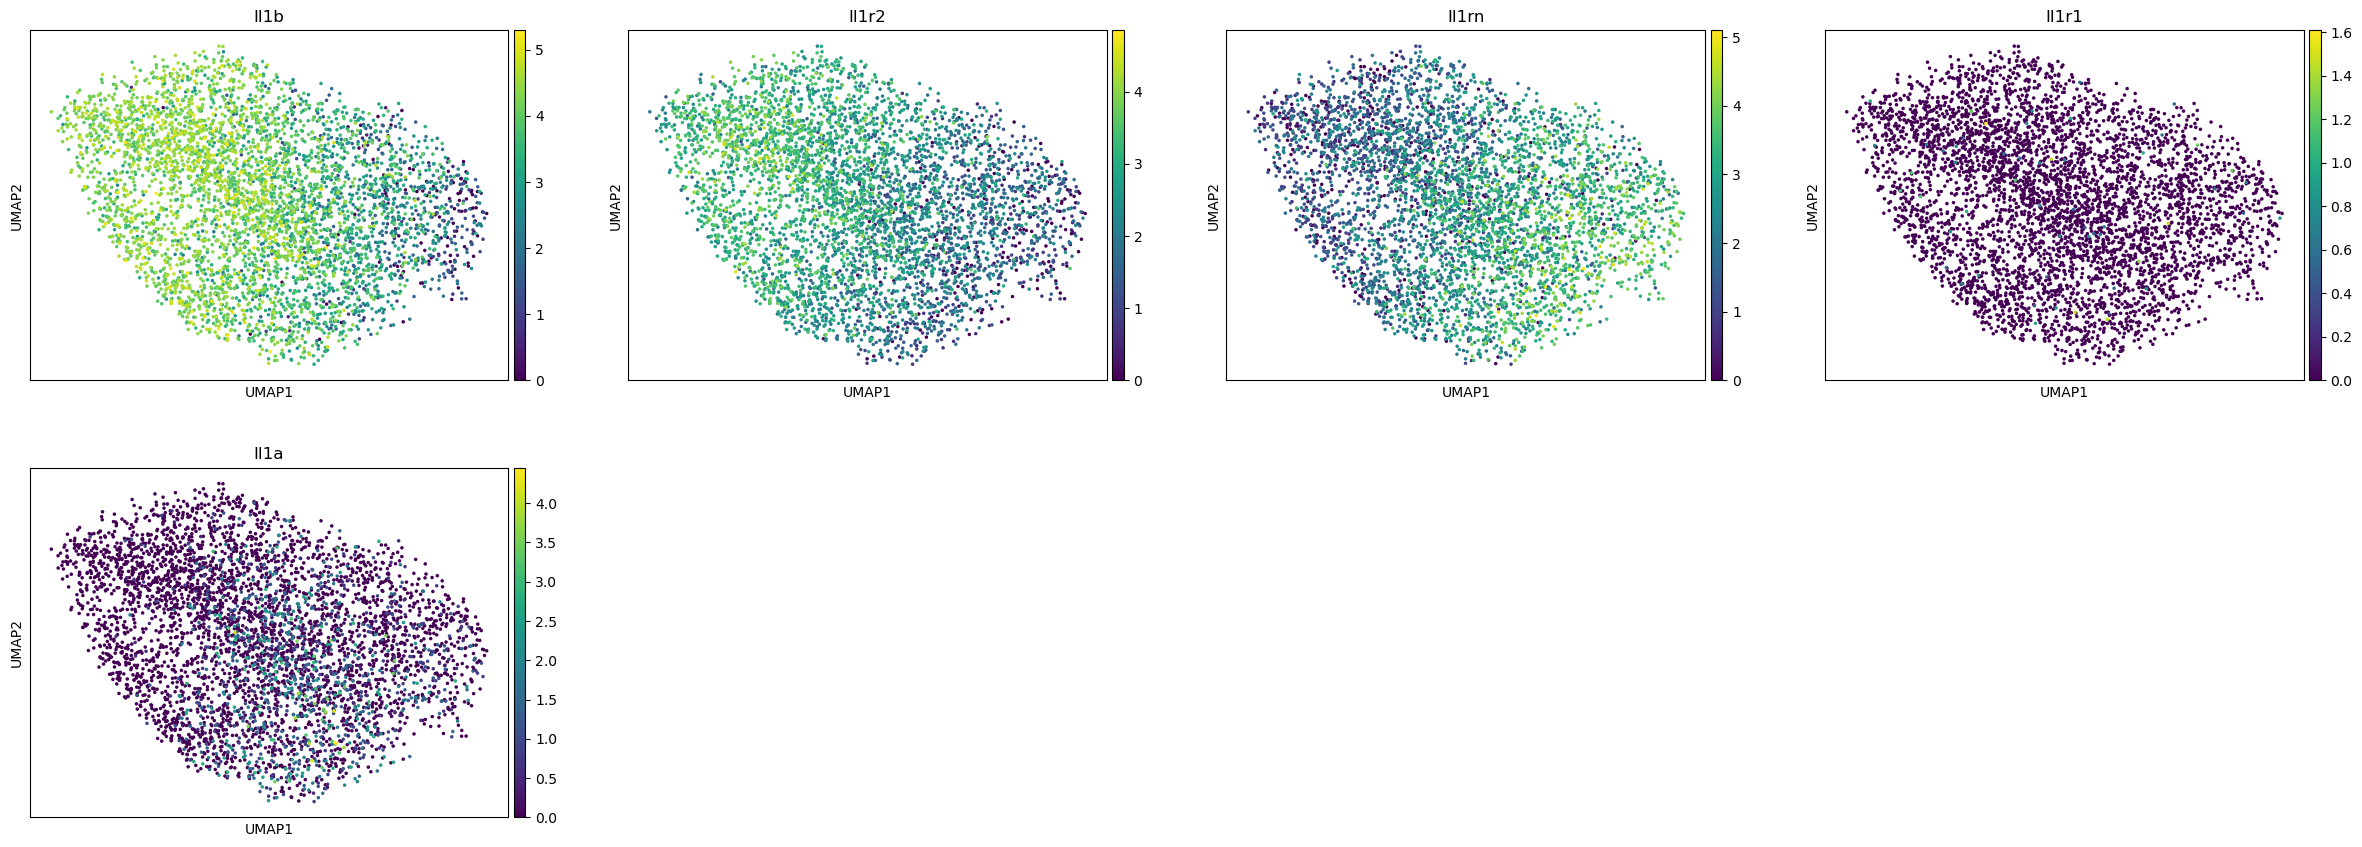

In [89]:
sc.pl.umap(cluster_1, color = ['Il1b','Il1r2','Il1rn','Il1r1','Il1a'])

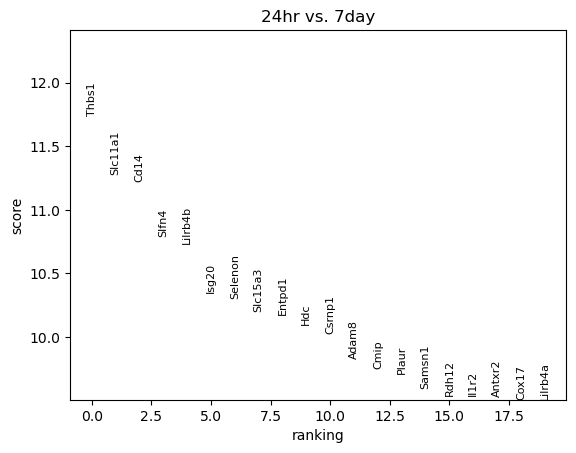

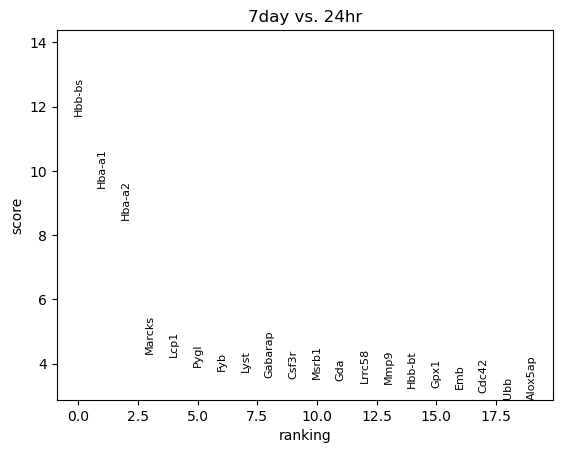

In [90]:
sample24 = wound_neutro[wound_neutro.obs['time_point'].isin(['7day', '24hr'])]
sc.tl.rank_genes_groups(sample24, groupby='time_point', reference='7day', method='wilcoxon')
sc.pl.rank_genes_groups(sample24, n_genes=20, sharey=False)
sample7 = wound_neutro[wound_neutro.obs['time_point'].isin(['7day', '24hr'])]
sc.tl.rank_genes_groups(sample7, groupby='time_point', reference='24hr', method='wilcoxon')
sc.pl.rank_genes_groups(sample7, n_genes=20, sharey=False)

In [91]:
import pandas as pd

# Extract results for the first analysis
result_24 = sample24.uns['rank_genes_groups']
group_24 = result_24['names'].dtype.names

# Create a DataFrame for log fold change and p-values for each group from bs24_combined
df_24 = pd.DataFrame()
for group in group_24:
    df_24['gene'] = result_24['names'][group]
    df_24[group + '_logfoldchange'] = result_24['logfoldchanges'][group]
    df_24[group + '_pvals'] = result_24['pvals'][group]
    df_24[group + '_pvals_adj'] = result_24['pvals_adj'][group]
    df_24[group + '_scores'] =result_24['scores'][group]

In [92]:
df_24
df_24.to_csv('df_24.csv', index=False)

In [93]:
import pandas as pd

# Extract results for the first analysis
result_7= sample7.uns['rank_genes_groups']
group_7 = result_7['names'].dtype.names

# Create a DataFrame for log fold change and p-values for each group from bs24_combined
df_7 = pd.DataFrame()
for group in group_7:
    df_7['gene'] = result_7['names'][group]
    df_7[group + '_logfoldchange'] = result_7['logfoldchanges'][group]
    df_7[group + '_pvals'] = result_7['pvals'][group]
    df_7[group + '_pvals_adj'] = result_7['pvals_adj'][group]
    df_7[group + '_scores'] =result_7['scores'][group]

In [94]:
df_7
df_7.to_csv('df_7.csv', index=False)